In [1]:
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import mannwhitneyu
import pingouin as pg

In [2]:
results_level_b = pd.read_csv('Results_level_B.csv')

In [3]:
results_level_b.head(5)

MNB    SVC  RandomForests  DecisionTreeClassifier  LSTM
0  80.0  85.67          86.00                   78.43    85
1  80.0  85.44          86.11                   78.00    85
2  80.0  85.00          86.54                   77.60    85
3  80.0  85.00          86.54                   78.00    84
4  78.0  83.21          86.54                   78.00    85

In [4]:
results_level_b.describe()

MNB        SVC  RandomForests  DecisionTreeClassifier       LSTM
count  10.000000  10.000000      10.000000               10.000000  10.000000
mean   79.545000  85.259000      85.996000               77.179000  84.800000
std     0.768942   0.837847       0.860674                1.548472   0.421637
min    78.000000  83.210000      84.560000               73.430000  84.000000
25%    79.137500  85.107500      85.250000               77.150000  85.000000
50%    80.000000  85.430000      86.275000               77.825000  85.000000
75%    80.000000  85.437500      86.540000               78.000000  85.000000
max    80.340000  86.550000      87.230000               78.430000  85.000000

<AxesSubplot:>

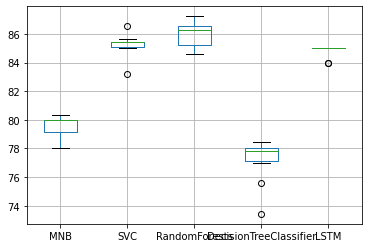

In [5]:
results_level_b.boxplot(column=['MNB','SVC','RandomForests','DecisionTreeClassifier','LSTM'])

# Hypothesis Testing

- Null hypothesis (H0) - Significant difference between two samples of accuracies.
- Alternate hypothesis (H1) - No significant difference between two samples of accuracies.
- t-test is used for the same, as the classifiers are run on the same dataset, we perform paired t-test.
- p-value is P(D|H0), so smaller the p-value, more confident we are of Null Hypothesis being false.
- If they are below siginificance level like 0.05 or 0.01 then we can reject the null hypothesis.

In [6]:
print("mean Accuracy of MNB:",results_level_b['MNB'].mean())
print("mean Accuracy of SVC:",results_level_b['SVC'].mean())
print("mean Accuracy of RandomForests:",results_level_b['RandomForests'].mean())
print("mean Accuracy of DecisionTreeClassifier:",results_level_b['DecisionTreeClassifier'].mean())
print("mean Accuracy of LSTM:",results_level_b['LSTM'].mean())

mean Accuracy of MNB: 79.545
mean Accuracy of SVC: 85.25900000000001
mean Accuracy of RandomForests: 85.99600000000001
mean Accuracy of DecisionTreeClassifier: 77.17899999999999
mean Accuracy of LSTM: 84.8


# Pairwise T-Tests and Mann-Whitney U tests

Let us perform T-Test between MNB and SVC

In [13]:
stats.ttest_rel(results_level_b.iloc[:,0], results_level_b.iloc[:,1])

Ttest_relResult(statistic=-21.171935750069004, pvalue=5.49164367624295e-09)

In [15]:
stat, p_value = mannwhitneyu(results_level_b.iloc[:,0],results_level_b.iloc[:,1])
print('Statistics=%.5f, p=%.5f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=0.00000, p=0.00015
Reject Null Hypothesis (Significant difference between two samples)


As we can see from the previous cell the mean accuracy of the SVC is 85.25 and MNB is 79.54, P-value being 0.000
P-value is less than the significance level of 0.05, rejecting the NULL hypothesis, SVC is performing better than MNB

Let us perform T-tests and Mann-Whitney U tests between SVC and LSTM

In [7]:
stats.ttest_rel(results_level_b.iloc[:,1], results_level_b.iloc[:,4])

Ttest_relResult(statistic=1.5649859468821004, pvalue=0.1520260211521449)

In [8]:
stat, p_value = mannwhitneyu(results_level_b.iloc[:,1],results_level_b.iloc[:,4])
print('Statistics=%.5f, p=%.5f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=82.00000, p=0.01058
Reject Null Hypothesis (Significant difference between two samples)


As we can see from the previous cell the mean accuracy of the SVC is 85.25 and LSTM is 84.8, P-value being 0.000
P-value is less than the significance level of 0.05, rejecting the NULL hypothesis, LSTM is performing better than SVC

Let us perform the T-tests and Mann-Whitney U tests on RFC and LSTM

In [9]:
stats.ttest_rel(results_level_b.iloc[:,2], results_level_b.iloc[:,1])

Ttest_relResult(statistic=1.89819256465307, pvalue=0.09014822000884508)

In [10]:
stat, p_value = mannwhitneyu(results_level_b.iloc[:,2],results_level_b.iloc[:,1])
print('Statistics=%.5f, p=%.5f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=69.00000, p=0.15817
Do not Reject Null Hypothesis (No significant difference between two samples)


As we can see from the previous cell the mean accuracy of the RFC is 85.99 and SVC is 85.25, P-value being 0.15817
P-value is greater than the significance level of 0.05, we fail to reject the NULL hypothesis, concluding that SVC and RFC are performing on the same level for Level B classification

## From these tests and box plots and mean accuracies values we can see that for level B RFC and SVC are the best performing models among the lot